# Project 1: Dallas Accident Data Analysis
Data Source: US Accident from Kaggle <br />
A Countrywide Traffic Accident Dataset (2016 - 2019) <br />
link: https://www.kaggle.com/sobhanmoosavi/us-accidents <br />

Team Members: Junaho Shen, Qinan Wang

In [1]:
import pandas as pd
import numpy as np

team = pd.DataFrame()
team['name'] = ['Junaho Shen', 'Qinan Wang','Yuchong Chen']
team['ID'] = ['48058365','48098262','48029817']
team['email'] = ['junhaos@smu.edu','qinanw@smu.edu','yuchongc@smu.edu']
team

,name,ID,email
0,Junaho Shen,48058365,junhaos@smu.edu
1,Qinan Wang,48098262,qinanw@smu.edu
2,Yuchong Chen,48029817,yuchongc@smu.edu


# 1. Business Understanding


This datasheet contains information that can be useful in identifying previous year vehicle accident trends within Dallas to identify where safety enhancements are needed.

The data was originally collected, according to Sobhan Moosavi from https://www.kaggle.com/sobhanmoosavi/us-accidents, has around 3 million rows and 49 features which including accidents locations, weather condition, accident severity level, environmental factors and other features to describe accident cases. 

The compeleted data visualization can provide straightforward advices to transportation company, traffic department, auto insurance companies for making business value in the future. Also, the navigation map can take the features we presented in the report to remind users for preventing possibly accident risk.

The datasheet description best explains how the database was collected (https://www.kaggle.com/sobhanmoosavi/us-accidents): "This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks."

Due to the oversize of dataset, we take Texas accidents data in 2019 as source dataset and distill all Dallas accidents as our research object.

As noted on https://www.nbcdfw.com/news/local/dallas-ranks-among-top-in-us-for-fatal-crashes-report/273443/, out of the largest 25 U.S. cities, Dallas is at the top of the list for traffic accidents. According to https://www.dallasnews.com/business/autos/2019/06/26/study-drivers-are-46-more-likely-to-get-into-accidents-on-dallas-roads-than-the-rest-of-the-u-s/, based on a study done by Allstate Dallas drivers are “46% more likely to get into a wreck than the average U.S. driver.

The goal for analyzing this data set is to find auto accident trends and hot locations that can assist the city with not only identifying where most accidents occur, but to also help make decisions on what locations should have a higher priority on safety enhancements.

If our predictions are correct, we would expect that after a location has been identified as a hot spot for auto accidents and has been “safety enhanced” by the city, there should be at least a 75% chance of a drop in auto accidents around that area. The reason we cannot guarantee a 100% chance of auto accident reductions is because some people are just simply bad drivers. 

# 2. Data Understanding
## 2.1 Data Description

In [2]:
print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('../data/2019_TX_Accidents.csv') # read in the csv file

df.head()

Pandas: 0.25.1
Numpy: 1.17.2


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-512477,MapQuest,201.0,2,2019-12-25 03:02:11,2019-12-25 03:46:51,29.419821,-98.536057,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-512478,MapQuest,201.0,2,2019-12-25 06:16:34,2019-12-25 06:45:40,29.591667,-98.352081,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Night,Day
2,A-512479,MapQuest,245.0,3,2019-12-25 19:16:43,2019-12-25 20:21:17,29.423311,-98.422562,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-512480,MapQuest,229.0,2,2019-12-25 00:16:20,2019-12-25 01:00:25,30.176735,-97.638504,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
4,A-512481,MapQuest,201.0,2,2019-12-25 00:57:57,2019-12-25 02:12:07,30.423965,-97.588974,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Night,Night


Before we start to work on 2019 Dallas accident data, we need to filter the data we need from 2019 Texas data, once we limit our research goal to Dallas, the data size down to 58,086 rows from 300,000 rows data from 2019 Texas data.

In [3]:
city_filter = df.City.str.contains('Dallas')
df = df[city_filter]
print(df.shape[0],'rows')

14725 rows


Now that we have limited our data to 58,086 rows, we can now begin analyizing the data given to us. Currently there are 49 features to this dataset. The field descriptions from https://smoosavi.org/datasets/us_accidents has shown all 49 features in the dataset. 

In [4]:
all_features = pd.read_csv('../data/US_accident_features.csv')
# remove unrequired columns
all_features.drop(['#','Nullable'], axis = 1,inplace = True)
pd.set_option('display.max_colwidth', 100)
all_features

,Attribute,Description
0,ID,This is a unique identifier of the accident record.
1,Source,Indicates source of the accident report (i.e. the API which reported the accident.).
2,TMC,A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed de...
3,Severity,"Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact..."
4,Start_Time,Shows start time of the accident in local time zone.
5,End_Time,Shows end time of the accident in local time zone.
6,Start_Lat,Shows latitude in GPS coordinate of the start point.
7,Start_Lng,Shows longitude in GPS coordinate of the start point.
8,End_Lat,Shows latitude in GPS coordinate of the end point.
9,End_Lng,Shows longitude in GPS coordinate of the end point.


We can remove following features because we only need Dallas accident data: **'Number','Street'.'Side','City','County','State','Zipcode','Country','TimeZone','Airport_Code','Weather_Timestamp'**.

we can see the features from **Amenity** to **Stop** are all point of interests(POI) annotation which indicate facilities around the accidents environment. This part belong to description of location, which do not make sense to our analysis, thus we discard them.

Finally, We remove the columns which is redundant or semantically useless:
**'ID', 'Source', 'TMC', 'End_Time', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'** and obtain following fields which match our business needs in the analysis. 

In [5]:
features = all_features.drop(all_features.index[[5,8,9]])
features = features.drop(all_features.index[0:3])
features = features.drop(all_features.index[11:23])
features = features.drop(all_features.index[32:45])
features = features.drop(all_features.index[46:49])
features = features.reset_index(drop=True)
# print(features)
features_display = pd.read_csv('../data/features.csv')
features_display
##

,Attribute,Description,scale,Discrete/Continuous
0,Severity,"Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact...",ordinal,discrete
1,Start_Time,Shows start time of the accident in local time zone.,ordinal,discrete
2,Start_Lat,Shows latitude in GPS coordinate of the start point.,interval,continuous
3,Start_Lng,Shows longitude in GPS coordinate of the start point.,interval,continuous
4,Distance(mi),The length of the road extent affected by the accident.,ratio,continuous
5,Temperature(F),Shows the temperature (in Fahrenheit).,interval,continuous
6,Wind_Chill(F),Shows the wind chill (in Fahrenheit).,interval,continuous
7,Humidity(%),Shows the humidity (in percentage).,interval,continuous
8,Pressure(in),Shows the air pressure (in inches),ratio,continuous
9,Visibility(mi),Shows visibility (in miles).,interval,continuous


In [6]:
features_selected = features["Attribute"]
df = df[features_selected]
df.tail()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
78684,3,2019-08-22 17:54:40,32.67827,-96.822740,0.466,96.0,96.0,36.0,29.09,10.0,S,12.0,0.0,Fair,Day
78688,3,2019-08-22 19:18:27,33.11951,-97.032410,0.379,96.0,96.0,36.0,29.14,10.0,S,10.0,0.0,Fair,Day
78689,3,2019-08-22 23:50:30,32.92601,-96.820616,0.006,88.0,88.0,48.0,29.21,10.0,SSE,8.0,0.0,Fair,Night
78695,3,2019-08-23 14:12:33,32.90422,-96.769110,0.672,91.0,91.0,49.0,29.23,10.0,NE,13.0,0.0,Mostly Cloudy,Day
78696,2,2019-08-23 09:50:30,32.79135,-96.813630,0.188,86.0,86.0,63.0,29.42,10.0,SSE,6.0,0.0,Mostly Cloudy,Day


Now that we have limited the data, it's time to take a look at some data statistics to see what we are working with within this dataset.

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,14725.000000,14725.000000,14725.000000,14725.000000,14700.000000,12737.000000,14699.000000,14723.000000,14703.000000,14467.000000,12074.000000
mean,2.406248,32.814005,-96.799879,0.067386,66.386497,66.717312,66.537383,29.550140,9.161525,9.096219,0.006784
std,0.508273,0.088836,0.073326,0.257377,17.633221,20.085867,19.921902,0.356539,2.273403,6.329676,0.054150
min,1.000000,32.627258,-97.072350,0.000000,21.000000,5.600000,15.000000,28.750000,0.200000,0.000000,0.000000
25%,2.000000,32.758640,-96.845291,0.000000,53.100000,55.000000,51.000000,29.300000,10.000000,6.000000,0.000000
50%,2.000000,32.798325,-96.802230,0.000000,68.000000,71.000000,69.000000,29.460000,10.000000,8.100000,0.000000
75%,3.000000,32.887798,-96.755707,0.000000,80.000000,82.000000,83.000000,29.720000,10.000000,12.000000,0.000000
max,4.000000,33.129891,-96.557159,6.920000,103.000000,103.000000,100.000000,30.740000,13.000000,255.000000,1.530000


In [8]:
# df['Sunrise_Sunset'].unique()
# change Sunrise_Sunset to numeric data
# df['Sunrise_Sunset'] = df['Sunrise_Sunset'].map(lambda 'Day' : 1， lambda 'Night' : 0)
def setDay_night(dn):
    if 'Day' in dn:
        return 1
    else:
        return 0
df['Sunrise_Sunset'] = df.apply(lambda x: setDay_night(x['Sunrise_Sunset']), axis = 1)

print(df.dtypes)
print('======================================')
print(df.info())
df.head()

Severity               int64
Start_Time            object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Sunrise_Sunset         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14725 entries, 17 to 78696
Data columns (total 15 columns):
Severity             14725 non-null int64
Start_Time           14725 non-null object
Start_Lat            14725 non-null float64
Start_Lng            14725 non-null float64
Distance(mi)         14725 non-null float64
Temperature(F)       14700 non-null float64
Wind_Chill(F)        12737 non-null float64
Humidity(%)          14699 non-null float64
Pressure(in)         14723 non-null float64
Visibility(mi)       14703 non-null float64
Wind

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
17,2,2019-12-25 05:31:56,32.676506,-96.857071,0.00,48.0,45.0,71.0,29.17,10.0,ESE,6.0,0.0,Fair,0
18,2,2019-12-25 05:54:34,32.841991,-96.775459,0.00,52.0,52.0,63.0,29.40,10.0,SSE,7.0,0.0,Mostly Cloudy,0
19,3,2019-12-25 07:11:26,32.658062,-96.735542,0.97,48.0,45.0,71.0,29.19,10.0,S,6.0,0.0,Fair,0
20,3,2019-12-25 07:24:50,32.817638,-96.871048,0.00,50.0,50.0,71.0,29.42,10.0,SSE,7.0,0.0,Mostly Cloudy,0
21,2,2019-12-25 14:09:49,32.703960,-96.832451,0.00,70.0,70.0,38.0,29.15,10.0,S,15.0,0.0,Fair,1


This does give us all fields. Looks like the data types that were missing from our dataset was bool and object data types. From looking at this, it looks like Number, Precipitation, Wind Chill, and Wind Speed are missing the most data but it's hard to tell from the table and statistics above how many records are affected.

But, using an additional library called missingno, we can see the missing data visually. By using the following command to install into Andaconda's distribution, we can run the additional library:<br />
`install conda install -c conda-forge missingno`

## 2.2 Data Quality
before we start to work on dataset, we need to find duplicates and impute missing data

### 2.2.1 Remove Duplicate

In [9]:
# find the duplicate instances
dupdf_pair = df[df.duplicated(keep = False)]
dupdf_pair.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
568,3,2019-12-30 07:25:41,32.925911,-96.820419,0.0,36.0,31.0,70.0,29.41,10.0,NW,6.0,0.0,Fair,0
572,3,2019-12-30 07:25:41,32.925911,-96.820419,0.0,36.0,31.0,70.0,29.41,10.0,NW,6.0,0.0,Fair,0
2166,3,2019-12-06 18:11:41,32.795898,-96.691589,0.0,59.0,59.0,48.0,29.73,10.0,NNW,12.0,0.0,Mostly Cloudy,0
2167,3,2019-12-06 18:11:41,32.795898,-96.691589,0.0,59.0,59.0,48.0,29.73,10.0,NNW,12.0,0.0,Mostly Cloudy,0
2329,2,2019-12-07 17:11:57,32.803703,-96.793297,0.0,63.0,63.0,43.0,29.65,10.0,SSE,5.0,0.0,Fair,1


In [10]:
# find the number of duplicate
print('Number of duplicate rows =', len(df[df.duplicated()]))
df.drop_duplicates(inplace = True)

Number of duplicate rows = 39


Find 114 duplicated rows which are filtered by all columns. Consider these duplicate rows have same **Time** and **location** value. Thus we remove these duplicate rows.

### 2.2.2 Missing Value

In [11]:
# Lets aggregate by severity first
df_grouped = df.groupby(by='Severity')
for val,grp in df_grouped:
    print('There were',len(grp),'accidents in',val,'severity level.')

There were 6 accidents in 1 severity level.
There were 8838 accidents in 2 severity level.
There were 5722 accidents in 3 severity level.
There were 120 accidents in 4 severity level.


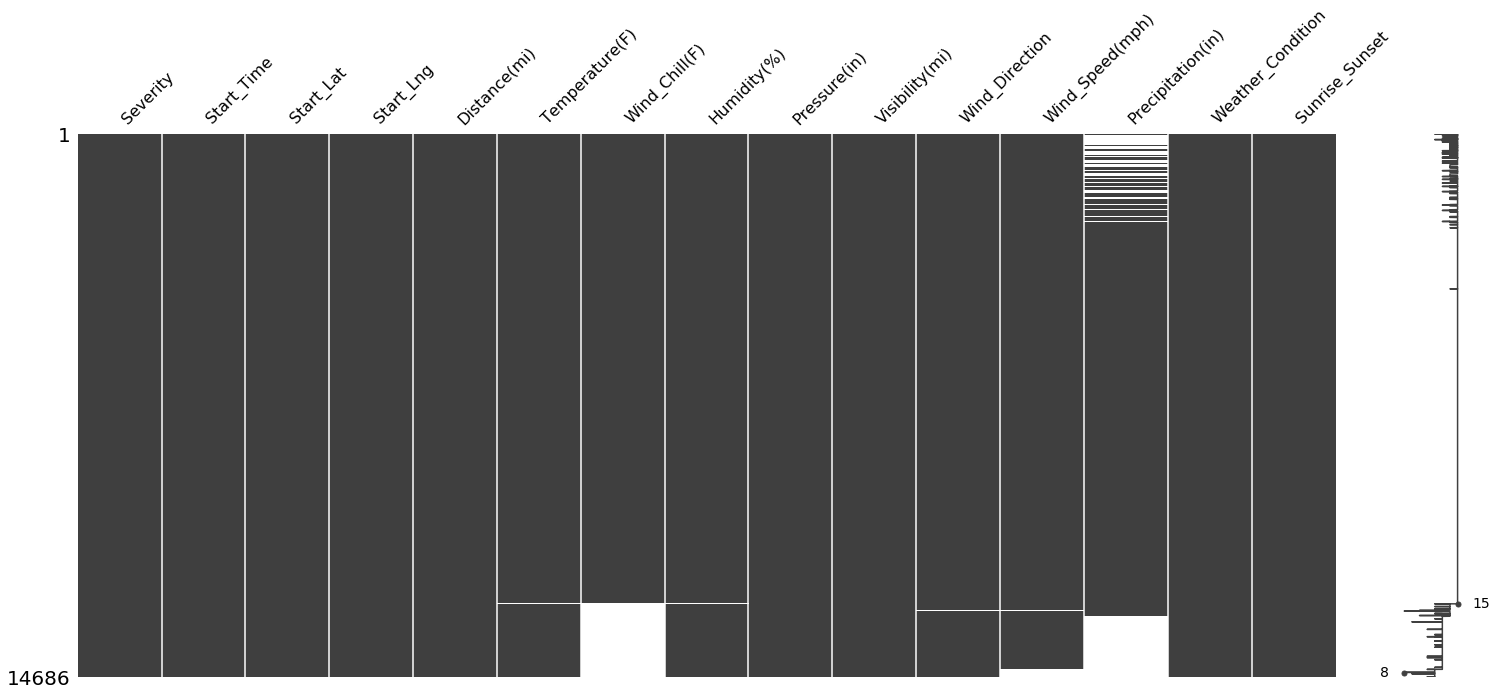

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=['Wind_Chill(F)','Precipitation(in)','Wind_Speed(mph)']))

We can see Wind Chill has a large chunk of data missing and it may not be useful in our business case, because we already have Temperature(F) data as a same measurement.

Precipitation seems to be missing a large chunk of data and this is an important feature for us to analysis the correlation, but fortunately, we find the majority of missing data in percipitation just because of no rain weather. Thus we can easily impute percipitation data by adding zero.

Wind speed has some missing data around 4000 and it is also a important factor which would cause an accident.
we can impute these missing data by using K-nearest neighbours algorithm.

In [13]:
# impute based upon the K closest samples (rows)
from sklearn.impute import KNNImputer
import copy

# remove wind chill features first
df = df.drop(['Wind_Chill(F)'],axis = 1)
# add zero to misssing data of Precipitation
temp = df.fillna({'Precipitation(in)':0})
# get object for imputation
knn_obj = KNNImputer(n_neighbors=5)

# create a numpy matrix from pandas numeric values to impute
temp = temp[['Severity','Pressure(in)','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)','Precipitation(in)']].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[['Severity','Pressure(in)','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)','Precipitation(in)']] = temp_imputed
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 17 to 78696
Data columns (total 14 columns):
Severity             14686 non-null float64
Start_Time           14686 non-null object
Start_Lat            14686 non-null float64
Start_Lng            14686 non-null float64
Distance(mi)         14686 non-null float64
Temperature(F)       14686 non-null float64
Humidity(%)          14686 non-null float64
Pressure(in)         14686 non-null float64
Visibility(mi)       14686 non-null float64
Wind_Direction       14657 non-null object
Wind_Speed(mph)      14686 non-null float64
Precipitation(in)    14686 non-null float64
Weather_Condition    14621 non-null object
Sunrise_Sunset       14686 non-null int64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.7+ MB


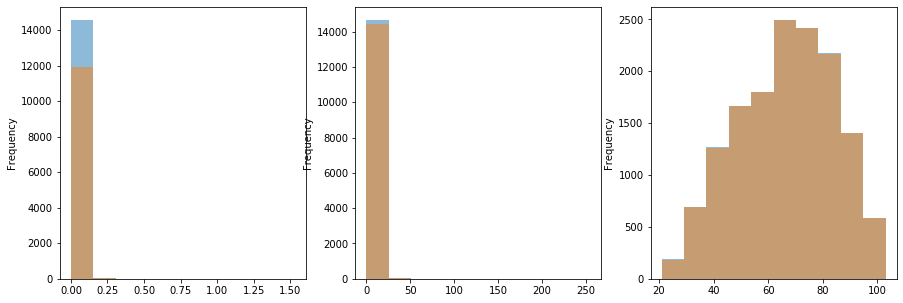

In [14]:
# These figure has shown the result after we imputed data
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df_imputed['Precipitation(in)'].plot(kind='hist',alpha=0.5)
df['Precipitation(in)'].plot(kind='hist', alpha=0.5)

plt.subplot(1,3,2)
df_imputed['Wind_Speed(mph)'].plot(kind='hist',alpha=0.5)
df['Wind_Speed(mph)'].plot(kind='hist', alpha=0.5)

plt.subplot(1,3,3)
df_imputed['Temperature(F)'].plot(kind='hist',alpha=0.5)
df['Temperature(F)'].plot(kind='hist', alpha=0.5)
plt.show()

Now that we have cleaned up our data, we want to see what continuous features can be converted into discrete values. Let's take a look at our current data statistics since this will remove object and boolean types for us.

In [15]:
df_imputed['Dates'] = pd.to_datetime(pd.to_datetime(df_imputed['Start_Time']).dt.date)
df_imputed['Time'] = pd.to_datetime(df_imputed['Start_Time']).dt.time
# df_imputed['Time'] = df_imputed['Time'].to_timestamp
# df_imputed.tail()
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 17 to 78696
Data columns (total 16 columns):
Severity             14686 non-null float64
Start_Time           14686 non-null object
Start_Lat            14686 non-null float64
Start_Lng            14686 non-null float64
Distance(mi)         14686 non-null float64
Temperature(F)       14686 non-null float64
Humidity(%)          14686 non-null float64
Pressure(in)         14686 non-null float64
Visibility(mi)       14686 non-null float64
Wind_Direction       14657 non-null object
Wind_Speed(mph)      14686 non-null float64
Precipitation(in)    14686 non-null float64
Weather_Condition    14621 non-null object
Sunrise_Sunset       14686 non-null int64
Dates                14686 non-null datetime64[ns]
Time                 14686 non-null object
dtypes: datetime64[ns](1), float64(10), int64(1), object(4)
memory usage: 1.9+ MB


# 3. Data Visualization
## 3.1 Visualize basic feature distributions
### 3.1.1 Temperature visualization

Matplotlib: 3.1.1


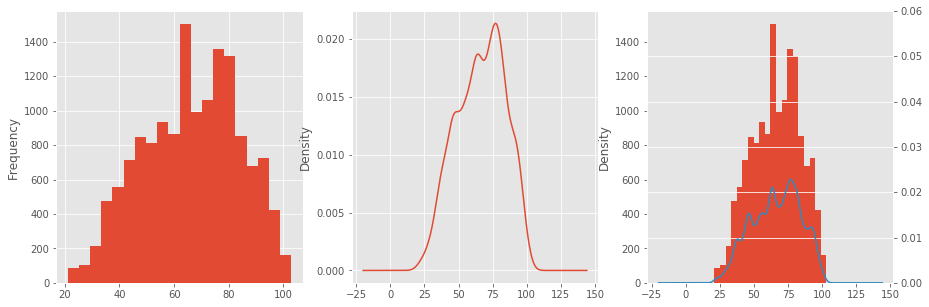

In [16]:
# generate histogram of Temperature
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)

plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_imputed['Temperature(F)'].plot.hist(bins=20)

plt.subplot(1,3,2)
df_imputed['Temperature(F)'].plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
df_imputed['Temperature(F)'].plot.hist(bins=20)
df_imputed['Temperature(F)'].plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim([0, 0.06])

plt.show()


In [17]:
df_imputed['Discrete_Temp'] = pd.cut(df['Temperature(F)'],[0,32,50,65,80,1e6],
                             labels=['freezing','cold','cool','warm','hot'])

df_imputed.Discrete_Temp.describe()

count     14661
unique        5
top        warm
freq       4298
Name: Discrete_Temp, dtype: object

In [18]:
df_grouped = df_imputed.groupby(by=['Discrete_Temp','Severity'])
df_temp = df_imputed.groupby(by=['Discrete_Temp'])
df_severity = df.groupby(by=['Severity'])
print (df_grouped['Discrete_Temp'].count()/df_temp['Discrete_Temp'].count() * 100)
# print (df_grouped['Discrete_Temp'].count())
# df_imputed.info()
# print (df_grouped['Severity'].count())

Discrete_Temp  Severity
freezing       2.0         58.082192
               3.0         40.273973
               4.0          1.643836
cold           1.0          0.070398
               2.0         58.289335
               3.0         40.795495
               4.0          0.844773
cool           1.0          0.054840
               2.0         59.692898
               3.0         39.457088
               4.0          0.795174
warm           1.0          0.046533
               2.0         62.470917
               3.0         36.807818
               4.0          0.674732
hot            2.0         59.544160
               3.0         39.572650
               4.0          0.883191
Name: Discrete_Temp, dtype: float64


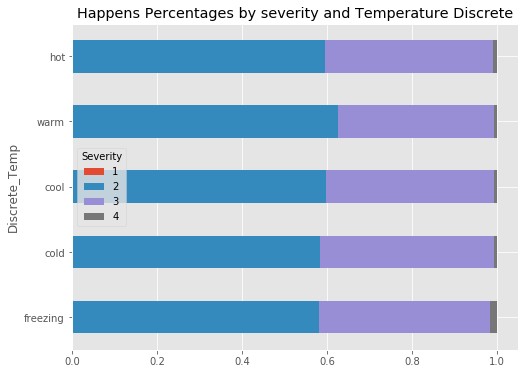

In [19]:
# happens_rate = df_grouped['Severity'].count()/df_temp['Discrete_Temp'].count()



temp = pd.crosstab(df_imputed['Discrete_Temp'], # categories to cross tabulate
                       df_imputed['Severity'].astype(int)) # how to group
temp_rate = temp.div(temp.sum(1).astype(float),axis=0)
temp_rate.plot(kind='barh', stacked=True, figsize=(8,6))

plt.title('Happens Percentages by severity and Temperature Discrete')
plt.show()

### 3.1.2 Visualization accidents happen in season

we grouped the date by Season, the season in dallas we can see as follow picture<br />
(refer:[https://weatherspark.com/y/8813/Average-Weather-in-Dallas-Texas-United-States-Year-Round]): <br/>
we defined month in season base on the average temperature in each month: <br/>
Spring from March to May <br/>
Summer from June to August<br/>
Fall from September to November<br/>
Winter from December to February<br/>
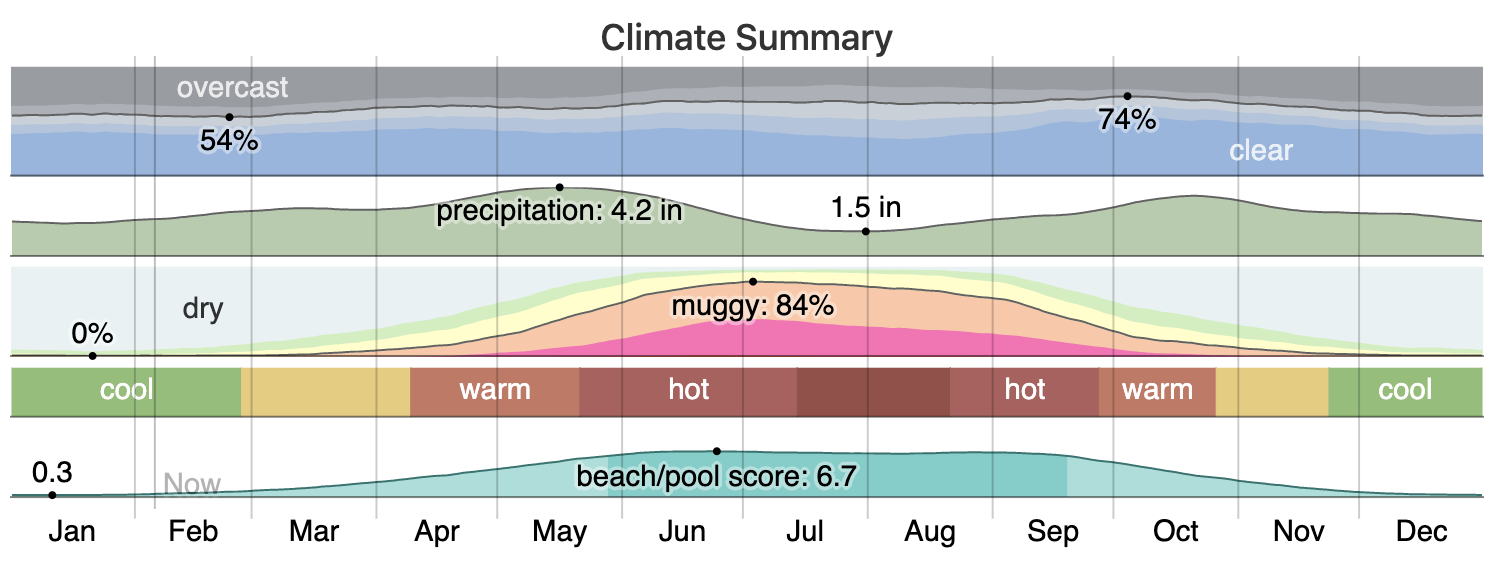

In [20]:
def dayReorder(day):
    if day > 334 and day <= 365:
        return day - 334
    else:
        return day
    
# generate day of year
df_imputed['doy'] = df_imputed['Dates'].dt.dayofyear
# reorder day of year, because some day in winter during Jan to Feb
df_imputed['doy'] = df_imputed.apply(lambda x: dayReorder(x['doy']), axis = 1)

# label and group
df_imputed['Season'] = pd.cut(
    df_imputed['doy'],
    [0, 58, 151, 243, 334],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)

df_season = df_imputed.groupby('Season')
# df_season['Season'].count()
for val,grp in df_season:
    print('There were',len(grp),'accidents happened during',val)

There were 3282 accidents happened during Winter
There were 3540 accidents happened during Spring
There were 3664 accidents happened during Summer
There were 4200 accidents happened during Fall


We can easily find: Fall have the most accidents cases, even there is more precipitation during summer and spring.<br />
The result shows an interesting phenomenon: drivers may take more carefully when they drive during the season with more precipitation.<br />
we can generate a more interesting histogram by adding sunrise_sunset value.

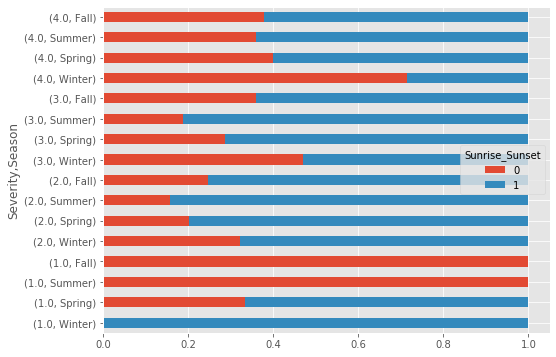

In [21]:
# the cross tab operator provides an easy way to get these numbers
day_night = pd.crosstab([df_imputed['Severity'],
                        df_imputed['Season']], # categories to cross tabulate
                       df_imputed['Sunrise_Sunset'].astype(int)) # how to group
daynight_rate = day_night.div(day_night.sum(1).astype(float),axis=0)
daynight_rate.plot(kind='barh', stacked=True, figsize=(8,6))

plt.show()
#0 means night time, 1 means day time

The plot has shown: during the winter, there are more severe accidents happen during night time and accidents may more likely to happen during day time in summer

## 3.2 Questions about this data set

### 3.2.1 Are there any special environmental conditions that played a part in the accidents

#### 3.2.1.2 What's the influence on accidents by weather condition?

In [22]:
# Check unique weather condition
weathers = df_imputed['Weather_Condition'].unique()
print('weather type:',len(weathers))
print(weathers)
print('null value:', df_imputed['Weather_Condition'].isnull().sum())

weather type: 40
['Fair' 'Mostly Cloudy' 'Cloudy' 'Partly Cloudy' 'Fog' 'T-Storm'
 'Light Rain' 'Rain' 'Light Rain with Thunder' 'Thunder'
 'Showers in the Vicinity' 'Fair / Windy' 'Mostly Cloudy / Windy'
 'Partly Cloudy / Windy' 'Cloudy / Windy' 'Light Drizzle' 'Shallow Fog'
 'Haze' 'Heavy T-Storm / Windy' 'Heavy T-Storm' 'Light Rain / Windy'
 'Heavy Rain / Windy' 'T-Storm / Windy' 'Thunder in the Vicinity' nan
 'Drizzle' 'Heavy Rain' 'Rain / Windy' 'Heavy Drizzle' 'Thunder / Windy'
 'Mist' 'Overcast' 'Scattered Clouds' 'Clear'
 'Light Thunderstorms and Rain' 'Thunderstorm' 'Thunderstorms and Rain'
 'Heavy Thunderstorms and Rain' 'Light Freezing Rain'
 'Light Freezing Drizzle']
null value: 65


In [23]:
# Merge some of weather conditions into 'Fair' 'Cloudy' 'Fog' 'Rain' 'Overcast'

df_dropweatherna = df_imputed.dropna(subset=['Weather_Condition'])
var_fair = ['Fair / Windy', 'Clear','Scattered Clouds']
var_cloudy = ['Partly Cloudy','Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy / Windy','Cloudy / Windy']
var_lightRain = ['Rain','Light Rain', 'Drizzle','Light Drizzle','Light Freezing Drizzle','Light Rain / Windy','Light Rain Showers','Light Freezing Rain','Heavy Drizzle']
var_heavyRain = ['Heavy Rain','Rain Showers','Heavy Rain Showers','Heavy Rain / Windy', 'Showers in the Vicinity','Rain / Windy']
var_Tstrom = ['Light Thunderstorms and Rain','Thunderstorms and Rain','Thunder / Windy','Thunderstorm','Heavy T-Storm','Heavy T-Storm / Windy','Heavy Thunderstorms and Rain','T-Storm','Light Rain with Thunder','Thunder','T-Storm / Windy','Thunder in the Vicinity']
var_fog = ['Shallow Fog','Haze','Mist']

def weather_stem(w):
    if w in var_fair:
        return 'fair'
    elif w in var_cloudy:
        return 'cloudy'
    elif w in var_lightRain:
        return 'light_rain'
    elif w in var_heavyRain:
        return 'heavy_rain'
    elif w in var_Tstrom:
        return 'Thunderstorm'
    elif w in var_fog:
        return 'fog'
    
df_imputed['Weather_Condition'] = df_imputed.apply(lambda x: weather_stem(x['Weather_Condition']), axis = 1)
print('null value:', df_imputed['Weather_Condition'].isnull().sum())

print('weathers categories: ',len(df_imputed['Weather_Condition'].unique()))
print('weathers: ',df_imputed['Weather_Condition'].unique())

null value: 8143
weathers categories:  7
weathers:  [None 'cloudy' 'Thunderstorm' 'light_rain' 'heavy_rain' 'fair' 'fog']


#### 3.2.1.3 What's the influence on accidents by wind speed?

In [24]:
def wspeed_scale(ws):
    if ws >= 0 and ws <= 1:
        return 0
    if ws > 1 and ws <= 3:
        return 1
    if ws > 3 and ws <=7:
        return 2
    if ws > 7 and ws <=12:
        return 3
    if ws > 12 and ws <=18:
        return 4
    if ws > 18 and ws <=24:
        return 5
    if ws > 24 and ws <=31:
        return 6
    if ws > 31 and ws <=38:
        return 7
    if ws > 38 and ws <=46:
        return 8
    if ws > 46 and ws <=54:
        return 9
    if ws > 54 and ws <=63:
        return 10
    if ws > 63 and ws <=72:
        return 11
    if ws > 72 and ws <=1e6:
        return 12
    else:
        return 0
df_imputed['wind_scale'] = df_imputed.apply(lambda x: wspeed_scale(x['Wind_Speed(mph)']), axis = 1)

df_wind = df_imputed.groupby(by=['wind_scale','Severity'])
df_wind = df_imputed.groupby(by=['wind_scale'])
# print (df_grouped['Severity'].count()/df_beaufort['Beaufort_Scale'].count() * 100)
print (df_wind['wind_scale'].count())

wind_scale
0      879
1      686
2     4213
3     5543
4     2919
5      382
6       55
7        4
12       5
Name: wind_scale, dtype: int64


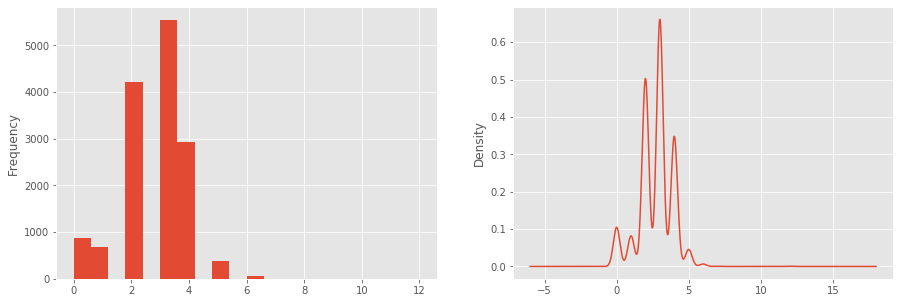

In [25]:
# df_imputed['wind_scale'].plot(kind='hist',alpha=0.5)

# plt.show()

plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df_imputed['wind_scale'].plot.hist(bins=20)

plt.subplot(1,2,2)
df_imputed['wind_scale'].plot.kde(bw_method=0.2)


plt.show()

### 3.2.4 What area of Dallas has the largest concentration of accidents?

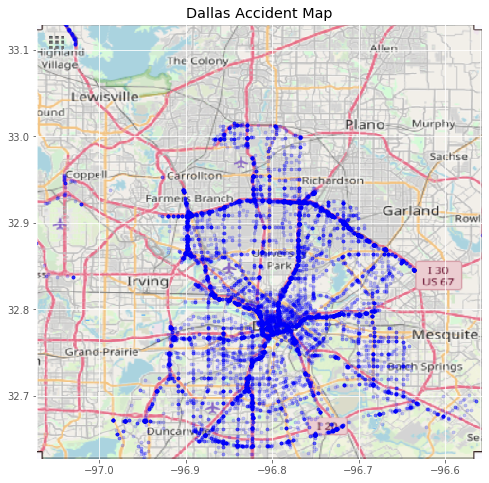

In [26]:
map_box = (df.Start_Lng.min(), df.Start_Lng.max(),
        df.Start_Lat.min(), df.Start_Lat.max())

ruh_m = plt.imread('DallasImage.png')

fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(df.Start_Lng, df.Start_Lat, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_title('Dallas Accident Map')
ax.set_xlim(map_box[0],map_box[1])
ax.set_ylim(map_box[2],map_box[3])

ax.imshow(ruh_m, zorder=0, extent = map_box, aspect = 'equal')

We can see most accidents happens on the high way in Dallas

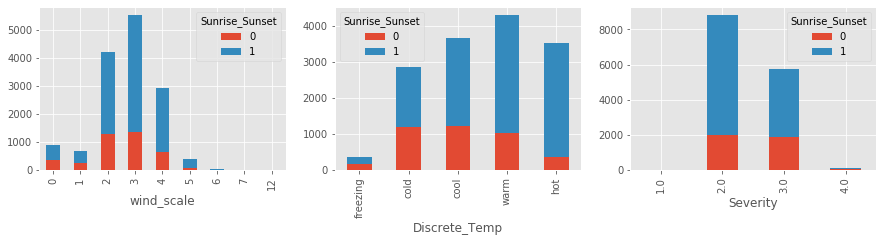

In [27]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df_imputed['wind_scale']], # categories to cross tabulate
            df_imputed['Sunrise_Sunset'].astype(int)).plot(kind='bar', stacked=True, ax=ax1) 

pd.crosstab([df_imputed['Discrete_Temp']], # categories to cross tabulate
            df_imputed['Sunrise_Sunset'].astype(int)).plot(kind='bar', stacked=True, ax=ax2) 

pd.crosstab([df_imputed['Severity']], # categories to cross tabulate
            df_imputed['Sunrise_Sunset'].astype(int)).plot(kind='bar', stacked=True, ax=ax3) 

plt.show()

In [28]:
import seaborn as sns
# cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)
# now try plotting some of the previous plots, way more visually appealing!!

Seaborn: 0.9.0


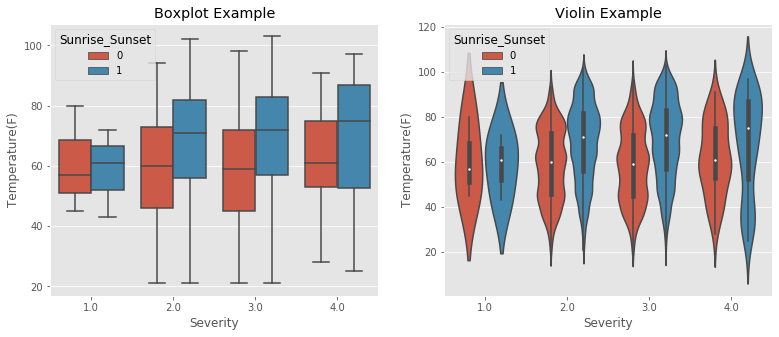

In [29]:
# sns boxplot
plt.subplots(figsize=(20, 5))

plt.subplot(1,3,1)
sns.boxplot(x="Severity", y='Temperature(F)', hue='Sunrise_Sunset', data=df_imputed)
plt.title('Boxplot Example')

plt.subplot(1,3,2)
sns.violinplot(x="Severity", y='Temperature(F)', hue='Sunrise_Sunset', data=df_imputed)
plt.title('Violin Example')

#Wind_Speed(mph)
# plt.subplot(1,3,3)
# sns.swarmplot(x="Severity", y='Temperature(F)', hue='Sunrise_Sunset', data=df_imputed)
# plt.title('Swarm Example')

plt.show()

# 4 Exceptional work

## 4.1 Lasso regression

## 4.1.1 Feature Correlation Plot

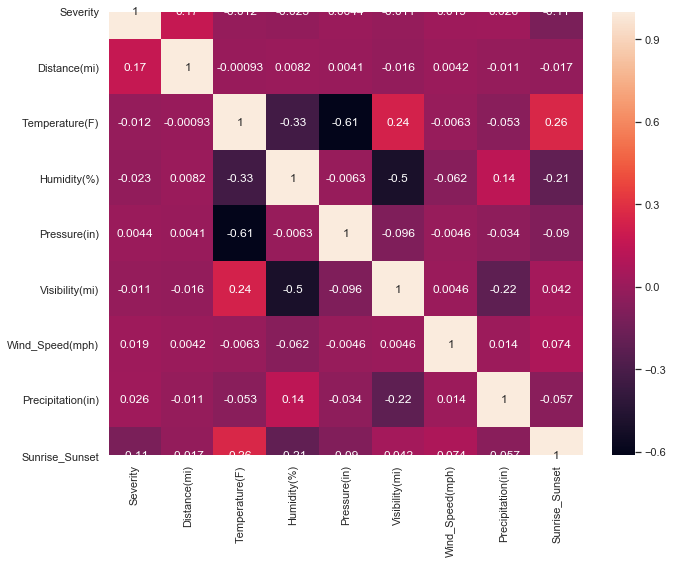

In [30]:
# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated? 
cmap = sns.set(style="darkgrid") # one of the many styles to plot using
vars_to_use = ['Severity','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Sunrise_Sunset']
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_imputed[vars_to_use].corr(), cmap=cmap, annot=True)

f.tight_layout()

From heat map, find that some features have strong correlation with each other: <br />
**'Precipitation' and 'Humidity'**;<br />
**'Temperature' and 'Pressure'**;<br />
**'Humidity' and 'Visibility'**. <br />

To get a better model, we choose Lasso regression as a solution to find which features have more potential value.

### 4.1.2 Model by Lasso regression

Lasso was originally introduced in the context of least squares, and it can be instructive to consider this case first, since it illustrates many of lasso’s properties in a straightforward setting. Consider a sample consisting of N cases, each of which consists of p covariates and a single outcome. Let be the outcome and be the covariate vector for the ith case. Then the objec-tive of lasso is to solve
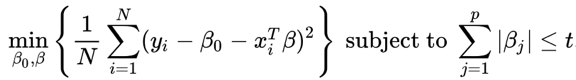
Using LASSO Regression to find out X’s(Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in), Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Discrete_Temp,wind_scale) effect on Severity.

In [31]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   

lsreg_var = ['Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Sunrise_Sunset']
df_imputed[lsreg_var].info()

X = df_imputed[lsreg_var]
Y = df_imputed['Severity']

# ========Lasso========
model = LassoCV()  # LassoCV automatically choose optimal alpha
model.fit(X,Y)   # linear regression model

# for var, coe in lsreg_var and model.coef_:
#     print(var, ' coefficiency is :', coe)
print('coefficient matrix:\n',model.coef_)
# print('linear regression model:\n',model)
# print('optimal alpha：',model.alpha_)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 17 to 78696
Data columns (total 8 columns):
Distance(mi)         14686 non-null float64
Temperature(F)       14686 non-null float64
Humidity(%)          14686 non-null float64
Pressure(in)         14686 non-null float64
Visibility(mi)       14686 non-null float64
Wind_Speed(mph)      14686 non-null float64
Precipitation(in)    14686 non-null float64
Sunrise_Sunset       14686 non-null int64
dtypes: float64(7), int64(1)
memory usage: 1.6 MB
coefficient matrix:
 [ 3.14828907e-01  1.52043878e-04 -1.63650988e-03 -4.52408556e-03
 -8.08062693e-03  1.85831565e-03  0.00000000e+00 -1.38907404e-01]


The 1st step is using Cross validation to find a best alpha value for LASSO regression.<br /> 
The 2nd step is to fit the LASSO regression by using the alpha found in 1st step. <br />
The result of model selection choose: <br />
**'Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Sunrise_Sunset'**. <br />
From the coefficient matrix, find that **'Distance(mi)','Pressure(in)', 'Visibility(mi)'** has a relatively stronger effect on **Severity**, which coefficients are **3.14828907e-01, -4.52408556e-03, -8.08062693e-03**. It can be inferred that lower Visibility will cause a worse accident and worse accidents are more likely to happen during the low pressure day.

Also, the initial assumption that we used to think: "precipitation may have strong effect to severity of accident" is a misunderstood, in Dallas, the precipitation have less effect on accident.

## 4.2 UMAP

/Users/macproshen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/macproshen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/macproshen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/macproshen/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


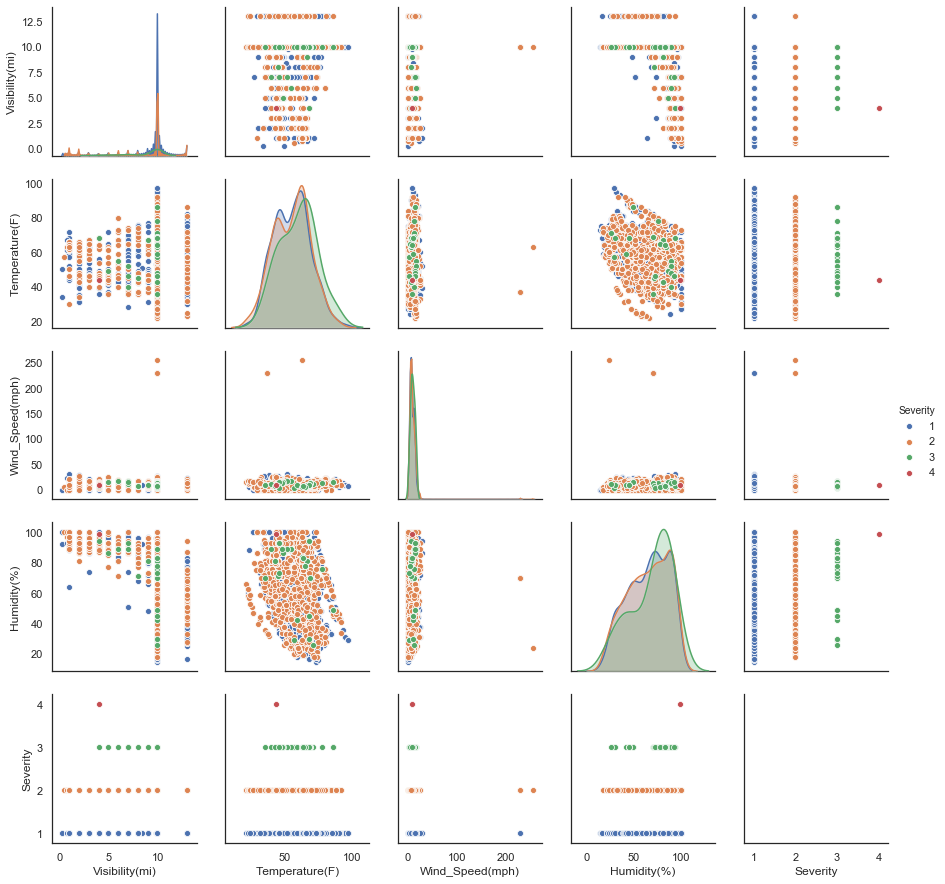

In [32]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

# df_temp = df_imputed.loc[:,['Severity','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)']]
# sns.pairplot(df_temp, hue='Severity');


df_pairplot = df_imputed.loc[:,['Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)']]

df_pairplot['Severity'] = pd.Series(df_imputed['Severity'].values).map(dict(zip(range(1,5),['4','1','2','3',])))
sns.pairplot(df_pairplot, hue='Severity');

/Users/macproshen/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/macproshen/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-package

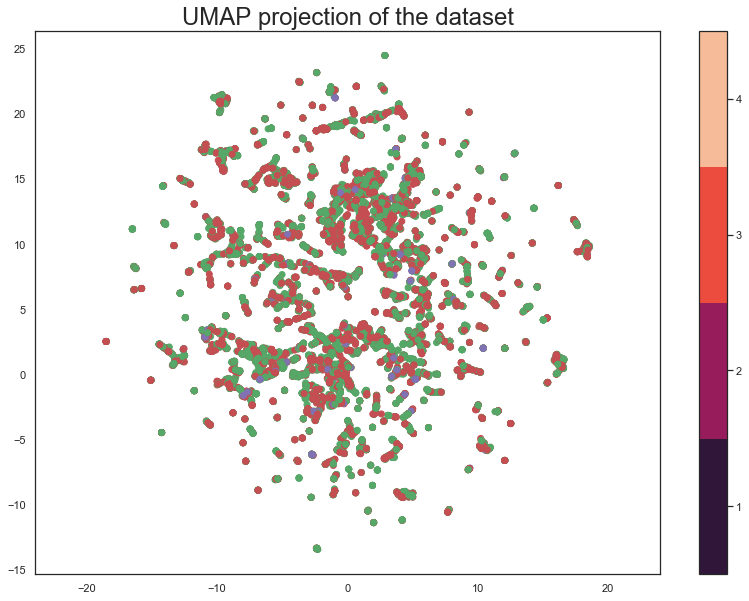

In [33]:
import umap.umap_ as umap
reducer = umap.UMAP()


df_umap = df_imputed.loc[:,['Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)']]
embedding = reducer.fit_transform(df_umap.to_numpy())
embedding.shape


plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in df_imputed['Severity'].values.astype(np.int)])
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(1,6)-0.5).set_ticks(np.arange(1,5))
plt.title('UMAP projection of the dataset', fontsize=24);